In [2]:
import pandas as pd #soru 2 kutuphaneler
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split, GridSearchCV #soru 3 kutuphaneler
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, roc_curve, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# ---------- 2. SORU ------------------------------

In [4]:
data_frame = pd.read_csv("veri-seti.txt", delimiter="\t")
data_frame.head()

,Nprg,PlGlu,DiaBlo,Thic,SerIns,BMI,DiaPed,Age,ClaVar,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN


In [5]:
data_frame = data_frame.drop("Unnamed: 9", axis = 1)
data_frame = data_frame.drop("Unnamed: 10", axis = 1)

In [6]:
X = data_frame.drop('ClaVar', axis=1)
y = data_frame['ClaVar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [8]:
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train, y_train)

GaussianNB()

In [9]:
y_pred_nb = naive_bayes_model.predict(X_test)

In [10]:
conf_matrix = confusion_matrix(y_test, y_pred_nb)

In [11]:
class_report = classification_report(y_test, y_pred_nb, output_dict=True)

In [12]:
fpr, tpr, _ = roc_curve(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])
roc_auc = roc_auc_score(y_test, naive_bayes_model.predict_proba(X_test)[:, 1])

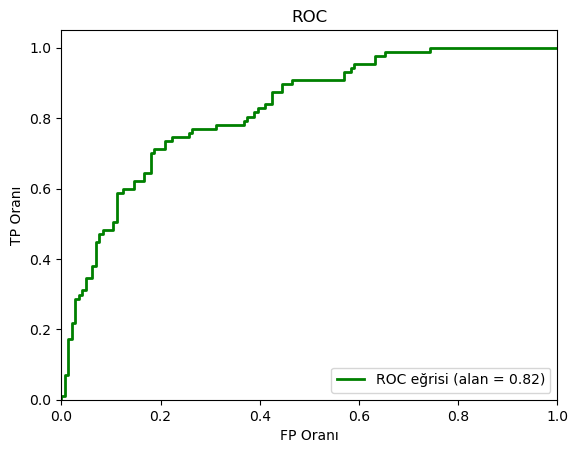

In [13]:
plt.figure()
plt.plot(fpr, tpr, color='green', lw=2, label='ROC eğrisi (alan = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Oranı')
plt.ylabel('TP Oranı')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [14]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Gerçek Negative', 'Gerçek Positive'], columns=['Tahmin Negative', 'Tahmin Positive'])
class_report_df = pd.DataFrame(class_report).transpose()

print("Confussion Matrix: \n")
print(conf_matrix_df)

print("\n\nClassification Report: \n")
print(class_report_df)

print("\n\nRoc Auc: \n")
print(roc_auc)

Confussion Matrix: 

                 Tahmin Negative  Tahmin Positive
Gerçek Negative              118               26
Gerçek Positive               30               57


Classification Report: 

              precision    recall  f1-score     support
0              0.797297  0.819444  0.808219  144.000000
1              0.686747  0.655172  0.670588   87.000000
accuracy       0.757576  0.757576  0.757576    0.757576
macro avg      0.742022  0.737308  0.739404  231.000000
weighted avg   0.755661  0.757576  0.756384  231.000000


Roc Auc: 

0.8240740740740741


In [15]:
# ---------- 3. SORU ------------------------------

In [16]:
data_frame = pd.read_csv("veri-seti.txt", delimiter="\t")
data_frame.head()

,Nprg,PlGlu,DiaBlo,Thic,SerIns,BMI,DiaPed,Age,ClaVar,Unnamed: 9,Unnamed: 10
0,6,148,72,35,0,33.6,0.627,50,1,NaN,NaN
1,1,85,66,29,0,26.6,0.351,31,0,NaN,NaN
2,8,183,64,0,0,23.3,0.672,32,1,NaN,NaN
3,1,89,66,23,94,28.1,0.167,21,0,NaN,NaN
4,0,137,40,35,168,43.1,2.288,33,1,NaN,NaN


In [17]:
data_frame = data_frame.drop("Unnamed: 9", axis = 1)
data_frame = data_frame.drop("Unnamed: 10", axis = 1)

In [18]:
X = data_frame.drop('ClaVar', axis=1)
y = data_frame['ClaVar']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
param_grid = {'n_neighbors': np.arange(1, 26)}

In [21]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=20, scoring='accuracy')

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25])},
             scoring='accuracy')

In [23]:
best_k_value = grid_search.best_params_['n_neighbors']
best_knn = grid_search.best_estimator_

best_k_value, best_knn

(15, KNeighborsClassifier(n_neighbors=15))

In [24]:
y_pred_optimized = best_knn.predict(X_test)

In [25]:
conf_matrix_optimized = confusion_matrix(y_test, y_pred_optimized)

In [26]:
class_report_optimized = classification_report(y_test, y_pred_optimized, output_dict=True)

In [27]:
y_prob_optimized = best_knn.predict_proba(X_test)[:, 1]
fpr_optimized, tpr_optimized, thresholds_optimized = roc_curve(y_test, y_prob_optimized)
roc_auc_optimized = roc_auc_score(y_test, y_prob_optimized)

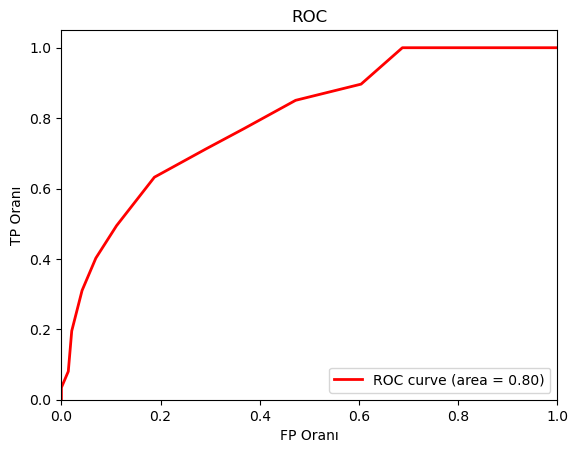

In [28]:
plt.figure()
plt.plot(fpr_optimized, tpr_optimized, color='red', lw=2, label=f'ROC curve (area = {roc_auc_optimized:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FP Oranı')
plt.ylabel('TP Oranı')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [29]:
class_report_optimized_df = pd.DataFrame(class_report_optimized).transpose()

In [30]:
print("En iyi K değeri: ", best_k_value)
print("\nConfussion Matrix: \n" )
print(conf_matrix_optimized)
print("\n\n Classification Report: \n")
print(class_report_optimized_df)
print("\n Roc Auc: ", roc_auc_optimized)

En iyi K değeri:  15

Confussion Matrix: 

[[128  16]
 [ 44  43]]


 Classification Report: 

              precision    recall  f1-score    support
0              0.744186  0.888889  0.810127  144.00000
1              0.728814  0.494253  0.589041   87.00000
accuracy       0.740260  0.740260  0.740260    0.74026
macro avg      0.736500  0.691571  0.699584  231.00000
weighted avg   0.738396  0.740260  0.726861  231.00000

 Roc Auc:  0.7964958492975734
